In [1]:
import os,sys
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize, stats
import seaborn as sns
import json

In [2]:
true = 376.
paces = [20,50,100,200,500,1000]

# HLDA-based CV (HLDA)
with open('../Rates/rates_H_chig.json','r') as f:
    H_rates_data = json.load(f)

# Radius of Gyration (Rg)
with open('../Rates/rates_G_chig.json','r') as f:
    G_rates_data = json.load(f)

# Rot-Mean-Squared Deviation (RMSD)
with open('../Rates/rates_R_chig.json','r') as f:
    R_rates_data = json.load(f)

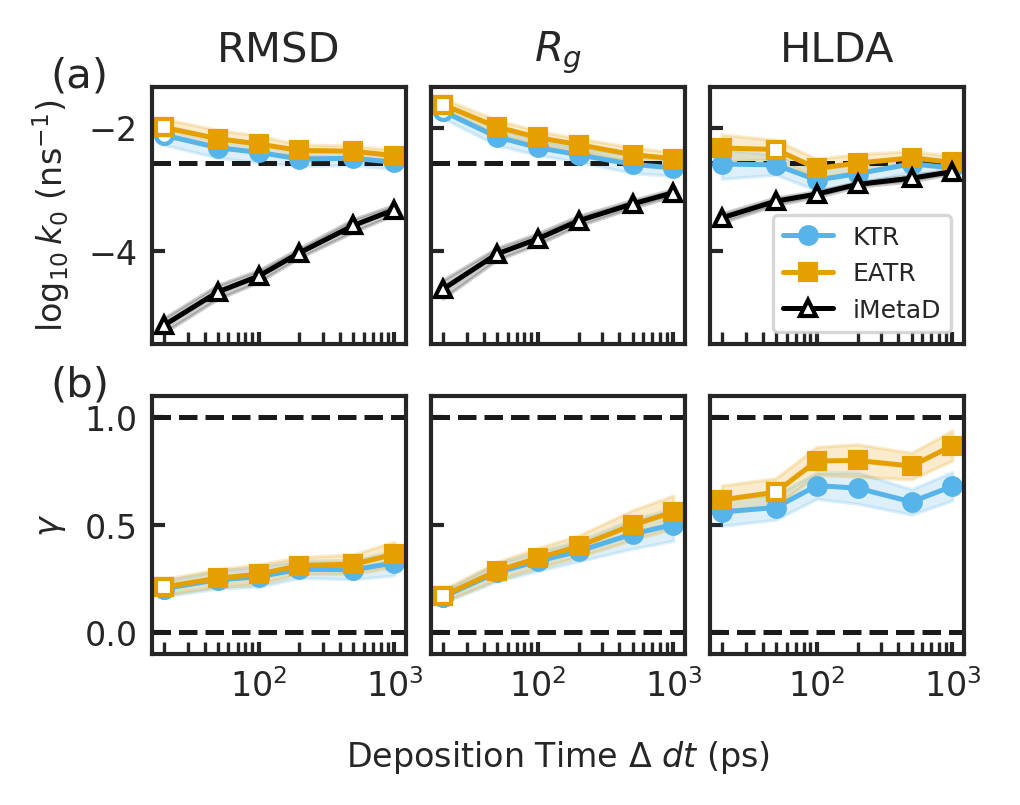

In [3]:
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 8, 'axes.linewidth': 1.0, 'lines.linewidth': 1.2, 'axes.titlesize': 10,
                             'xtick.labelsize': 8, 'ytick.labelsize': 8, 'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
                             'legend.fontsize': 6, 'legend.framealpha': 0, 'lines.markersize': 4})

fig, axs = plt.subplots(2,3,figsize=(3.3,2.7),dpi=300,sharey='row',sharex=True)
fig.subplots_adjust(wspace=0.1,bottom=0.18,left=0.15,right=0.97)

H_imetad_pass = None
H_KTR_pass = "ALL"
K_EATR_pass = [0,2,3,4,5]
G_imetad_pass = None
G_KTR_pass = [1,2,3,4,5]
G_EATR_pass = [1,2,3,4,5]
R_imetad_pass = None
R_KTR_pass = [1,2,3,4,5]
R_EATR_pass = [1,2,3,4,5]

# Rates

axs[0,0].set_ylabel('$\log_{10} k_0$ ($\mathrm{ns}^{-1}$)')
axs[0,0].set_yticks([-6,-4,-2])
axs[0,0].set_xscale('log')
axs[0,0].text(-0.4,1.0,"(a)",fontsize=10,transform=axs[0,0].transAxes)

axs[0,2].axhline(y=np.log10(1/true),color='k',linestyle='--')
axs[0,2].plot(paces,np.log10(np.array(H_rates_data["KTR Vmb CDF k"])),marker='o',markersize=4,color='#56B4E9',label='KTR')
axs[0,2].fill_between(paces,np.log10(np.array(H_rates_data["KTR Vmb CDF k"]))-H_rates_data["KTR Vmb CDF std k"],np.log10(np.array(H_rates_data["KTR Vmb CDF k"]))+H_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,2].plot(paces,np.log10(np.array(H_rates_data["EATR CDF k"])),marker='s',color='#E69F00',label='EATR')
axs[0,2].plot(paces[1],np.log10(np.array(H_rates_data["EATR CDF k"])[1]),marker='s',mfc='#FFFFFF',color='#E69F00')
axs[0,2].fill_between(paces,np.log10(np.array(H_rates_data["EATR CDF k"]))-H_rates_data["EATR CDF std k"],np.log10(np.array(H_rates_data["EATR CDF k"]))+H_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,2].plot(paces,np.log10(np.array(H_rates_data["iMetaD CDF k"])),marker='^',mfc='#FFFFFF',color='#000000',label='iMetaD')
axs[0,2].fill_between(paces,np.log10(np.array(H_rates_data["iMetaD CDF k"]))-H_rates_data["iMetaD CDF std k"],np.log10(np.array(H_rates_data["iMetaD CDF k"]))+H_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,2].legend()
axs[0,2].set_title('HLDA')

axs[0,1].axhline(y=np.log10(1/true),color='k',linestyle='--')
axs[0,1].plot(paces,np.log10(np.array(G_rates_data["KTR Vmb CDF k"])),marker='o',markersize=4,color='#56B4E9')
axs[0,1].plot(paces[0],np.log10(np.array(G_rates_data["KTR Vmb CDF k"])[0]),marker='o',mfc='#FFFFFF',markersize=4,color='#56B4E9')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data["KTR Vmb CDF k"]))-G_rates_data["KTR Vmb CDF std k"],np.log10(np.array(G_rates_data["KTR Vmb CDF k"]))+G_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,1].plot(paces,np.log10(np.array(G_rates_data["EATR CDF k"])),marker='s',color='#E69F00')
axs[0,1].plot(paces[0],np.log10(np.array(G_rates_data["EATR CDF k"])[0]),marker='s',mfc='#FFFFFF',color='#E69F00')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data["EATR CDF k"]))-G_rates_data["EATR CDF std k"],np.log10(np.array(G_rates_data["EATR CDF k"]))+G_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,1].plot(paces,np.log10(np.array(G_rates_data["iMetaD CDF k"])),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data["iMetaD CDF k"]))-G_rates_data["iMetaD CDF std k"],np.log10(np.array(G_rates_data["iMetaD CDF k"]))+G_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,1].set_title('$R_g$')

axs[0,0].axhline(y=np.log10(1/true),color='k',linestyle='--')
axs[0,0].plot(paces,np.log10(np.array(R_rates_data["KTR Vmb CDF k"])),marker='o',markersize=4,color='#56B4E9')
axs[0,0].plot(paces[0],np.log10(np.array(R_rates_data["KTR Vmb CDF k"])[0]),marker='o',mfc='#FFFFFF',markersize=4,color='#56B4E9')
axs[0,0].fill_between(paces,np.log10(np.array(R_rates_data["KTR Vmb CDF k"]))-R_rates_data["KTR Vmb CDF std k"],np.log10(np.array(R_rates_data["KTR Vmb CDF k"]))+R_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,0].plot(paces,np.log10(np.array(R_rates_data["EATR CDF k"])),marker='s',color='#E69F00')
axs[0,0].plot(paces[0],np.log10(np.array(R_rates_data["EATR CDF k"])[0]),marker='s',mfc='#FFFFFF',color='#E69F00')
axs[0,0].fill_between(paces,np.log10(np.array(R_rates_data["EATR CDF k"]))-R_rates_data["EATR CDF std k"],np.log10(np.array(R_rates_data["EATR CDF k"]))+R_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,0].plot(paces,np.log10(np.array(R_rates_data["iMetaD CDF k"])),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,0].fill_between(paces,np.log10(np.array(R_rates_data["iMetaD CDF k"]))-R_rates_data["iMetaD CDF std k"],np.log10(np.array(R_rates_data["iMetaD CDF k"]))+R_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,0].set_title('RMSD')

# Gamma

axs[1,0].set_ylabel('$\gamma$')
axs[1,0].set_xscale('log')
axs[1,0].set_ylim((-0.1,1.1))
axs[1,0].text(-0.4,1.0,"(b)",fontsize=10,transform=axs[1,0].transAxes)

axs[1,2].axhline(y=1,color='k',linestyle='--')
axs[1,2].axhline(y=0,color='k',linestyle='--')
axs[1,2].plot(paces,np.array(H_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,2].fill_between(paces,np.array(H_rates_data["KTR Vmb CDF g"])-H_rates_data["KTR Vmb CDF std g"],np.array(H_rates_data["KTR Vmb CDF g"])+H_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,2].plot(paces,np.array(H_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,2].plot(paces[1],np.array(H_rates_data["EATR CDF g"])[1],marker='s',mfc='#FFFFFF',color='#E69F00')
axs[1,2].fill_between(paces,np.array(H_rates_data["EATR CDF g"])-H_rates_data["EATR CDF std g"],np.array(H_rates_data["EATR CDF g"])+H_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)

axs[1,1].axhline(y=1,color='k',linestyle='--')
axs[1,1].axhline(y=0,color='k',linestyle='--')
axs[1,1].plot(paces,np.array(G_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,1].plot(paces[0],np.array(G_rates_data["KTR Vmb CDF g"])[0],marker='o',mfc='#FFFFFF',markersize=4,color='#56B4E9')
axs[1,1].fill_between(paces,np.array(G_rates_data["KTR Vmb CDF g"])-G_rates_data["KTR Vmb CDF std g"],np.array(G_rates_data["KTR Vmb CDF g"])+G_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,1].plot(paces,np.array(G_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,1].plot(paces[0],np.array(G_rates_data["EATR CDF g"])[0],marker='s',mfc='#FFFFFF',color='#E69F00')
axs[1,1].fill_between(paces,np.array(G_rates_data["EATR CDF g"])-G_rates_data["EATR CDF std g"],np.array(G_rates_data["EATR CDF g"])+G_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)

axs[1,0].axhline(y=1,color='k',linestyle='--')
axs[1,0].axhline(y=0,color='k',linestyle='--')
axs[1,0].plot(paces,np.array(R_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,0].plot(paces[0],np.array(R_rates_data["KTR Vmb CDF g"])[0],marker='o',mfc='#FFFFFF',markersize=4,color='#56B4E9')
axs[1,0].fill_between(paces,np.array(R_rates_data["KTR Vmb CDF g"])-R_rates_data["KTR Vmb CDF std g"],np.array(R_rates_data["KTR Vmb CDF g"])+R_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,0].plot(paces,np.array(R_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,0].plot(paces[0],np.array(R_rates_data["EATR CDF g"])[0],mfc='#FFFFFF',marker='s',color='#E69F00')
axs[1,0].fill_between(paces,np.array(R_rates_data["EATR CDF g"])-R_rates_data["EATR CDF std g"],np.array(R_rates_data["EATR CDF g"])+R_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)
fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for ax in axs.flatten():
    ax.tick_params(axis='both', direction='in', which='both', length=3)
plt.xlabel('Deposition Time $\\Delta~dt$ (ps)')

plt.savefig("EATR_Fig6.pdf",format='pdf')